# Downloading Libs and Testing That They Are Working

Make sure you can successfully import all packages below without errors:

In [4]:
import nltk # https://www.nltk.org/install.html
import numpy # https://www.scipy.org/install.html
import matplotlib.pyplot # https://matplotlib.org/downloads.html
# import tweepy # https://github.com/tweepy/tweepy
# import TwitterSearch # https://github.com/ckoepp/TwitterSearch
# import unidecode # https://pypi.python.org/pypi/Unidecode
# import langdetect # https://pypi.python.org/pypi/langdetect
# import langid # https://github.com/saffsd/langid.py
# import gensim # https://radimrehurek.com/gensim/install.html

You also need to run `nltk.download()` in order to download NLTK before proceeding:

In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Text Analysis Using nltk.text

In [6]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [7]:
my_string = "Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park, that girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee. I trap, trap, trap on the phone. Moving that cornflakes, rice crispies. Hold tight my girl Whitney."
tokens = word_tokenize(my_string)
tokens = [word.lower() for word in tokens]
tokens

['two',
 'plus',
 'two',
 'is',
 'four',
 ',',
 'minus',
 'one',
 'that',
 "'s",
 'three',
 '—',
 'quick',
 'maths',
 '.',
 'every',
 'day',
 'man',
 "'s",
 'on',
 'the',
 'block',
 '.',
 'smoke',
 'trees',
 '.',
 'see',
 'your',
 'girl',
 'in',
 'the',
 'park',
 ',',
 'that',
 'girl',
 'is',
 'an',
 'uckers',
 '.',
 'when',
 'the',
 'thing',
 'went',
 'quack',
 'quack',
 'quack',
 ',',
 'your',
 'men',
 'were',
 'ducking',
 '!',
 'hold',
 'tight',
 'asznee',
 ',',
 'my',
 'brother',
 '.',
 'he',
 "'s",
 'got',
 'a',
 'pumpy',
 '.',
 'hold',
 'tight',
 'my',
 'man',
 ',',
 'my',
 'guy',
 '.',
 'he',
 "'s",
 'got',
 'a',
 'frisbee',
 '.',
 'i',
 'trap',
 ',',
 'trap',
 ',',
 'trap',
 'on',
 'the',
 'phone',
 '.',
 'moving',
 'that',
 'cornflakes',
 ',',
 'rice',
 'crispies',
 '.',
 'hold',
 'tight',
 'my',
 'girl',
 'whitney',
 '.']

In [8]:
t = Text(tokens)
t

<Text: two plus two is four , minus one...>

This method of converting raw strings to NLTK `Text` instances can be used when reading text from a file. For instance:
```python
f = open('my-file.txt','rU') # Opening a file with the mode 'U' or 'rU' will open a file for reading in universal newline mode. All three line ending conventions will be translated to a "\n"
raw = f.read()
```

In [9]:
t.concordance('girl') # concordance() is a method of the Text class of NLTK. It finds words and displays a context window. Word matching is not case-sensitive.
# concordance() is defined as follows: concordance(self, word, width=79). Note default values for optional params.

Displaying 3 of 3 matches:
n the block . smoke trees . see your girl in the park , that girl is an uckers
s . see your girl in the park , that girl is an uckers . when the thing went q
akes , rice crispies . hold tight my girl whitney .


In [10]:
[2,2,3].count(2)

2

In [10]:
t.count('quack')

3

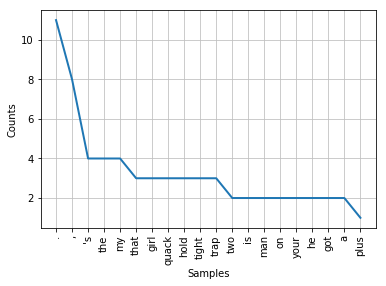

In [12]:
t.plot(20) # plots 20 most common tokens

In [13]:
t.vocab()

FreqDist({'.': 11, ',': 8, "'s": 4, 'the': 4, 'my': 4, 'that': 3, 'girl': 3, 'quack': 3, 'hold': 3, 'tight': 3, ...})

# Deriving N-Grams from Text

Based on [N-Gram-Based Text Categorization: Categorizing Text With Python by Alejandro Nolla](http://blog.alejandronolla.com/2013/05/20/n-gram-based-text-categorization-categorizing-text-with-python/)

What are n-grams? See [here](http://cloudmark.github.io/Language-Detection/).

## 1. Tokenization

In [14]:
s = "Le temps est un grand maître, dit-on, le malheur est qu'il tue ses élèves."
s = s.lower()

In [15]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Z'`éèî]+")
s_tokenized = tokenizer.tokenize(s)
s_tokenized

['le',
 'temps',
 'est',
 'un',
 'grand',
 'maître',
 'dit',
 'on',
 'le',
 'malheur',
 'est',
 "qu'il",
 'tue',
 'ses',
 'élèves']

In [16]:
from nltk.util import ngrams
generated_4grams = []

for word in s_tokenized:
    generated_4grams.append(list(ngrams(word, 4, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'))) # n = 4.
generated_4grams

[[('_', '_', '_', 'l'),
  ('_', '_', 'l', 'e'),
  ('_', 'l', 'e', '_'),
  ('l', 'e', '_', '_'),
  ('e', '_', '_', '_')],
 [('_', '_', '_', 't'),
  ('_', '_', 't', 'e'),
  ('_', 't', 'e', 'm'),
  ('t', 'e', 'm', 'p'),
  ('e', 'm', 'p', 's'),
  ('m', 'p', 's', '_'),
  ('p', 's', '_', '_'),
  ('s', '_', '_', '_')],
 [('_', '_', '_', 'e'),
  ('_', '_', 'e', 's'),
  ('_', 'e', 's', 't'),
  ('e', 's', 't', '_'),
  ('s', 't', '_', '_'),
  ('t', '_', '_', '_')],
 [('_', '_', '_', 'u'),
  ('_', '_', 'u', 'n'),
  ('_', 'u', 'n', '_'),
  ('u', 'n', '_', '_'),
  ('n', '_', '_', '_')],
 [('_', '_', '_', 'g'),
  ('_', '_', 'g', 'r'),
  ('_', 'g', 'r', 'a'),
  ('g', 'r', 'a', 'n'),
  ('r', 'a', 'n', 'd'),
  ('a', 'n', 'd', '_'),
  ('n', 'd', '_', '_'),
  ('d', '_', '_', '_')],
 [('_', '_', '_', 'm'),
  ('_', '_', 'm', 'a'),
  ('_', 'm', 'a', 'î'),
  ('m', 'a', 'î', 't'),
  ('a', 'î', 't', 'r'),
  ('î', 't', 'r', 'e'),
  ('t', 'r', 'e', '_'),
  ('r', 'e', '_', '_'),
  ('e', '_', '_', '_')],
 [('_', '_

It seems that `generated_4grams` needs flattening since it's supposed to be a list of 4-grams:

In [17]:
generated_4grams = [word for sublist in generated_4grams for word in sublist]
generated_4grams[:10]

[('_', '_', '_', 'l'),
 ('_', '_', 'l', 'e'),
 ('_', 'l', 'e', '_'),
 ('l', 'e', '_', '_'),
 ('e', '_', '_', '_'),
 ('_', '_', '_', 't'),
 ('_', '_', 't', 'e'),
 ('_', 't', 'e', 'm'),
 ('t', 'e', 'm', 'p'),
 ('e', 'm', 'p', 's')]

## 2. Obtaining n-grams (n = 4)

In [18]:
ng_list_4grams = generated_4grams
for idx, val in enumerate(generated_4grams):
    ng_list_4grams[idx] = ''.join(val)
ng_list_4grams[:10]

['___l',
 '__le',
 '_le_',
 'le__',
 'e___',
 '___t',
 '__te',
 '_tem',
 'temp',
 'emps']

## 3. Sorting n-grams by frequency (n = 4)

In [19]:
freq_4grams = {}

for ngram in ng_list_4grams:
    if ngram not in freq_4grams:
        freq_4grams.update({ngram: 1})
    else:
        ngram_occurrences = freq_4grams[ngram]
        freq_4grams.update({ngram: ngram_occurrences + 1})
        
from operator import itemgetter # The operator module exports a set of efficient functions corresponding to the intrinsic operators of Python. For example, operator.add(x, y) is equivalent to the expression x + y.

freq_4grams_sorted = sorted(freq_4grams.items(), key=itemgetter(1), reverse=True)[0:300] # We only keep the 300 most popular n-grams. This was suggested in the original paper written about n-grams.
freq_4grams_sorted

[('e___', 4),
 ('s___', 3),
 ('t___', 3),
 ('___l', 2),
 ('__le', 2),
 ('_le_', 2),
 ('le__', 2),
 ('___t', 2),
 ('___e', 2),
 ('__es', 2),
 ('_est', 2),
 ('est_', 2),
 ('st__', 2),
 ('n___', 2),
 ('___m', 2),
 ('__ma', 2),
 ('es__', 2),
 ('__te', 1),
 ('_tem', 1),
 ('temp', 1),
 ('emps', 1),
 ('mps_', 1),
 ('ps__', 1),
 ('___u', 1),
 ('__un', 1),
 ('_un_', 1),
 ('un__', 1),
 ('___g', 1),
 ('__gr', 1),
 ('_gra', 1),
 ('gran', 1),
 ('rand', 1),
 ('and_', 1),
 ('nd__', 1),
 ('d___', 1),
 ('_maî', 1),
 ('maît', 1),
 ('aîtr', 1),
 ('ître', 1),
 ('tre_', 1),
 ('re__', 1),
 ('___d', 1),
 ('__di', 1),
 ('_dit', 1),
 ('dit_', 1),
 ('it__', 1),
 ('___o', 1),
 ('__on', 1),
 ('_on_', 1),
 ('on__', 1),
 ('_mal', 1),
 ('malh', 1),
 ('alhe', 1),
 ('lheu', 1),
 ('heur', 1),
 ('eur_', 1),
 ('ur__', 1),
 ('r___', 1),
 ('___q', 1),
 ('__qu', 1),
 ("_qu'", 1),
 ("qu'i", 1),
 ("u'il", 1),
 ("'il_", 1),
 ('il__', 1),
 ('l___', 1),
 ('__tu', 1),
 ('_tue', 1),
 ('tue_', 1),
 ('ue__', 1),
 ('___s', 1),
 ('__s

# NLTK Corpus

Based on *Exercise B: Sentiment Analysis* in [Natural Language Processing with Python/NLTK by Luciano M. Guasco](https://github.com/luchux/ipython-notebook-nltk/blob/master/NLP%20-%20MelbDjango.ipynb)

## 1. Exploring the `movie_reviews` corpus

In [20]:
from nltk.corpus import movie_reviews # These are movie reviews already separated as positive and negative.
#movie_reviews.readme().replace('\n', ' ').replace('\t', '').replace('``', '"').replace("''", '"').replace('`', "'")

In [21]:
movie_reviews.fileids()

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [22]:
len(movie_reviews.fileids())

2000

In [23]:
movie_reviews.raw("neg/cv000_29416.txt").replace("\n", "").replace("'", '"').replace('"', "'") # Note here I found a trick to get rid of \' in text. However it only works if there were no " used.

"plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what's the deal ? watch the movie and ' sorta ' find out . . . critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it's simply too jumbled . it starts off ' normal ' but then downshifts into this ' fantasy ' world in which you , as an audience member , have no idea what's

# Finding Unusual Words in Given Language

In [30]:
text = "Truly Kryptic is the best puzzle game. It's browser-based and free. Google it."

## 1. Tokenizing text

In [31]:
from nltk import word_tokenize
text_tokenized = word_tokenize(text.lower())
text_tokenized

['truly',
 'kryptic',
 'is',
 'the',
 'best',
 'puzzle',
 'game',
 '.',
 'it',
 "'s",
 'browser-based',
 'and',
 'free',
 '.',
 'google',
 'it',
 '.']

## 2. Importing and exploring the words corpus

In [32]:
from nltk.corpus import words
words.readme().replace('\n', ' ')

'Wordlists  en: English, http://en.wikipedia.org/wiki/Words_(Unix) en-basic: 850 English words: C.K. Ogden in The ABC of Basic English (1932) '

In [33]:
words.words('en')[:10]

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron']

In [34]:
words.words('en-basic')[:10]

['I',
 'a',
 'able',
 'about',
 'account',
 'acid',
 'across',
 'act',
 'addition',
 'adjustment']

In [35]:
len(words.words('en'))

235886

In [36]:
len(words.words('en-basic'))

850

## 3. Finding unusual words

In [37]:
english_vocab = set(w.lower() for w in words.words())
text_vocab = set(w.lower() for w in text_tokenized if w.isalpha()) # Note .isalpha() removes punctuation tokens. However, tokens with a hyphen like 'browser-based' are totally skipped over because .isalpha() would be false.
unusual = text_vocab.difference(english_vocab)
unusual

{'google'}

# One Hot Encoding

## Using Pandas

In [11]:
import pandas as pd
s = pd.Series(list('abca'))
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [12]:
import pandas as pd

df = pd.DataFrame({
          'A':['a','b','a'],
          'B':['b','a','c']
        })
df



,A,B
0,a,b
1,b,a
2,a,c


In [13]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['B'])
# Drop column B as it is now encoded
df = df.drop('B',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df  

,A,a,b,c
0,a,0,1,0
1,b,1,0,0
2,a,0,0,1


## Using Numpy

In [15]:
import numpy as np
nb_classes = 6
data = [[2, 3, 4, 0]]

def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]


In [17]:
np.eye(6)[[2,4]]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

## Regular Expression

In [42]:
import re

test_string = "^Posted \r\nFebruary 21, 2019 05:51:41\r\nThe statistics are very clear."

#### Finding matches in RE

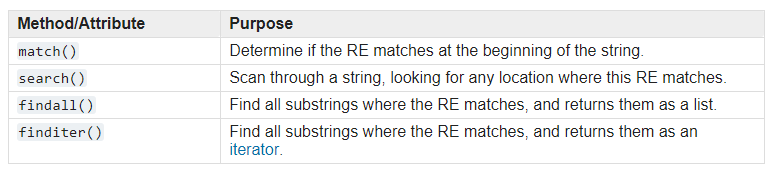

##### Metacharacters
. ^ $ * + ? { } [ ] \ | ( )

[        ] is a class of characters or range of characters e.g. [abc], [a-c] (both are equivalent)

In [ ]:
pattern = '[abcd]'
re.findall(pattern, test_string)

In [ ]:
() matches a group of characters with order

In [ ]:
pattern = '(abcd)'
re.findall(pattern, test_string) #matches exact order so nothing is returned here

In [45]:
pattern = '(st)'
re.findall(pattern, test_string)

['st', 'st', 'st']

^ is a complement of the set, effective only when place in front of the class 

In [46]:
pattern = '[^A-Z]' #match non-capitals
re.findall(pattern, test_string)[:10]

['^', 'o', 's', 't', 'e', 'd', ' ', '\r', '\n', 'e']

In [47]:
pattern = '[A-Z^]' #will act as a character if placed behind
re.findall(pattern, test_string)

['^', 'P', 'F', 'T']

| is OR character

In [48]:
pattern = 'a|b|c|d' #here it's equivalent to specifying character class [abcd]
re.findall(pattern, test_string)

['d', 'b', 'a', 'a', 'c', 'a', 'c', 'a']

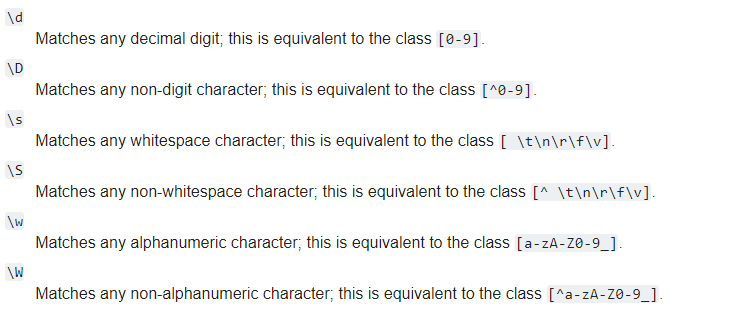

'*' matches ZERO or more times while '+' matches ONE or more 

In [49]:
pattern = '\d'
re.findall(pattern, test_string)

['2', '1', '2', '0', '1', '9', '0', '5', '5', '1', '4', '1']

In [51]:
pattern = '\d+'
re.findall(pattern, test_string)

['21', '2019', '05', '51', '41']

In [53]:
pattern = '\d*:'
re.findall(pattern, test_string) #matches any number that appears before :

['05:', '51:']

In [114]:
pattern = '[a-zA-Z]+'
re.findall(pattern, test_string) #equivalent to getting all the words

['Posted', 'February', 'The', 'statistics', 'are', 'very', 'clear']

In [88]:
words = 'region string action that fusion ends with fashion -ion session'
#how to get all the words that end with -ion
pattern = '[a-z]+ion'
re.findall(pattern, words)

['region', 'action', 'fusion', 'fashion', 'session']

In [116]:
pattern = '(\S+)ion'
re.findall(pattern, words) #match any non-white space group of characters before ion

['reg', 'act', 'fus', 'fash', '-', 'sess']

### Getting the data for tf-idf

TripAdvisor Reviews for Torrey Pines Glinder Port next to UCSD

In [118]:
from bs4 import BeautifulSoup
import requests
url = "https://www.tripadvisor.com/g32578-d877873.html"

In [124]:
res = requests.get(url)
page = BeautifulSoup(res.text, 'html.parser')

In [143]:
reviews = page.find_all('div', class_='review-container')
review_text = []
review_header = []
for i in range(len(reviews)):
    review_header.append(reviews[i].find('span', class_='noQuotes').text)
    review_text.append(reviews[i].find('p', class_='partial_entry').text)

## TF-IDF

How important that a word is for a document. TF-IDF is defined by:

$tf(t, d_i) = \frac{number \space of\space times\space t \space appears \space in \space the \space d_i}{number \space of \space words \space in \space the \space d_i}$

$idf(t) = \log(\frac{{\space total \space number \space of \space documents}}{{\rm number \space of \space documents \space in \space which \space t \space appears}})$

$tfidf(t, d_i) = tf(t, d_i) \cdot idf(t)$

In order to analyze the sentiment of text, we tend to look for KEYWORDS.

In [144]:
review_header #Most reviews are positive, suggesting you should visit 

['Beautiful views!',
 'Add this stop to your La Jolla Visit!',
 'Pave the lot',
 'Beware of Remote Controlled Planes',
 'Great Views and Incredible to Watch These People',
 'Sit in the sun and watch the gliders over the cliffs and ocean',
 'Beautiful',
 'just went to watch',
 'Breathtaking Beauty',
 'Cali Visit ']

In [145]:
# Find TF-IDF of the following words
words = ['amazing', 'beautiful', 'area', 'to', 'visit']
